# Pythonic Syntactic Sugar

The Image Basics Notebook was straight forward and closely follows ITK's C++ interface.

Sugar is great it gives your energy to get things done faster! SimpleITK has applied a generous about of syntactic sugar to help get things done faster too.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', aspect='equal')
%matplotlib inline
import SimpleITK as sitk
# Download data to work on
%run update_path_to_download_script
from downloaddata import fetch_data as fdata

Let us begin by developing a convenient method for displaying images in our notebooks.

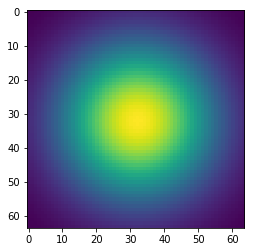

In [8]:
img = sitk.GaussianSource(size=[64]*2)
plt.imshow(sitk.GetArrayViewFromImage(img))

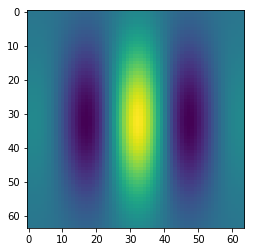

In [9]:
img = sitk.GaborSource(size=[64]*2, frequency=.03)
plt.imshow(sitk.GetArrayViewFromImage(img))

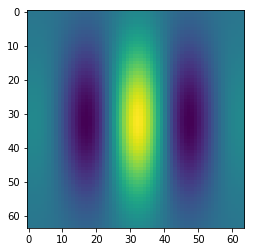

In [10]:
def myshow(img):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda)
myshow(img)

## Multi-dimension slice indexing

If you are familiar with numpy, sliced index then this should be cake for the SimpleITK image. The Python standard slice interface for 1-D object:

<table>
    <tr><td>Operation</td>	<td>Result</td></tr>
    <tr><td>d[i]</td>	<td>i-th item of d, starting index 0</td></tr>
    <tr><td>d[i:j]</td>	<td>slice of d from i to j</td></tr>
    <tr><td>d[i:j:k]</td>	<td>slice of d from i to j with step k</td></tr>
</table>

With this convenient syntax many basic tasks can be easily done.

In [15]:
img[24,24]

0.048901304602622986

### Cropping

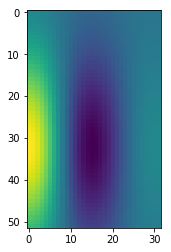

In [33]:
myshow(img[32:64,:-12,])

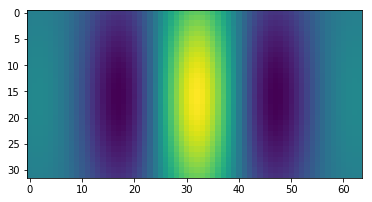

In [13]:
myshow(img[:,16:-16])

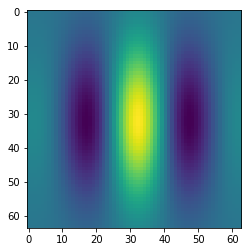

In [37]:
myshow(img[:-1,:])

### Flipping

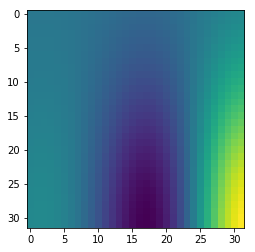

In [34]:
img_corner = img[:32,:32]
myshow(img_corner)

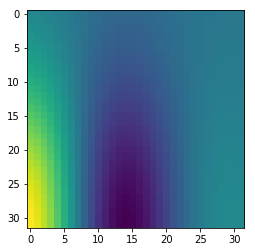

In [35]:
myshow(img_corner[::-1,:])

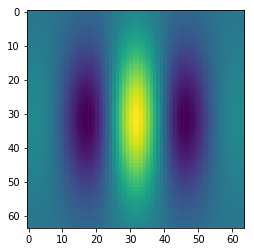

In [38]:
myshow(sitk.Tile(img_corner, img_corner[::-1,::],img_corner[::,::-1],img_corner[::-1,::-1], [2,2]))

### Slice Extraction

A 2D image can be extracted from a 3D one.

TypeError: Invalid dimensions for image data

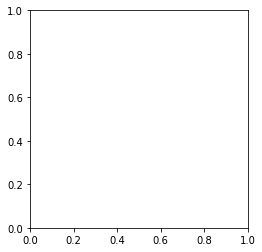

In [43]:
img = sitk.GaborSource(size=[64]*3, frequency=0.05)

# Why does this produce an error?
myshow(img)

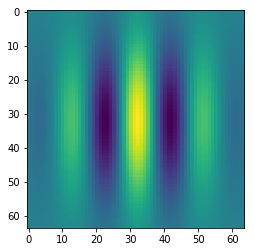

In [44]:
myshow(img[:,:,32])

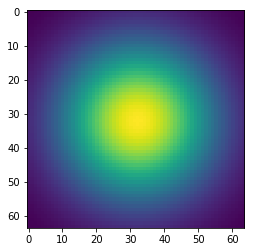

In [45]:
myshow(img[16,:,:])

### Subsampling

In [ ]:
myshow(img[:,::3,32])

## Mathematical Operators

Most python mathematical operators are overloaded to call the SimpleITK filter which does that same operation on a per-pixel basis. They can operate on a two images or an image and a scalar.

If two images are used then both must have the same pixel type. The output image type is usually the same.

As these operators basically call ITK filter, which just use raw C++ operators, care must be taken to prevent overflow, and divide by zero etc.

<table>
    <tr><td>Operators</td></tr>
    <tr><td>+</td></tr>
    <tr><td>-</td></tr>
    <tr><td>&#42;</td></tr>
    <tr><td>/</td></tr>
    <tr><td>//</td></tr>
    <tr><td>**</td></tr>
</table>


Fetching cthead1.png


14.0

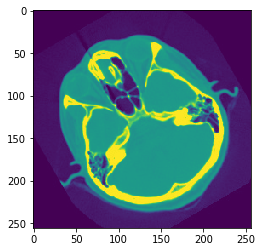

In [86]:
img = sitk.ReadImage(fdata("cthead1.png"))
img = sitk.Cast(img,sitk.sitkFloat32)
myshow(img)
img[150,150]

timg = img.__div__(10)
myshow(timg)
timg[150,150]

-160.0

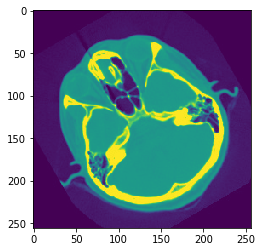

In [81]:
timg = img-300
myshow(timg)
timg[150,150]

### Division Operators

All three Python division operators are implemented `__floordiv__`, `__truediv__`, and `__div__`.

The true division's output is a double pixel type.

See [PEP 238](http://www.python.org/peps/pep-0238) to see why Python changed the division operator in Python 3.

### Bitwise Logic Operators

<table>
    <tr><td>Operators</td></tr>
    <tr><td>&</td></tr>
    <tr><td>|</td></tr>
    <tr><td>^</td></tr>
    <tr><td>~</td></tr>
</table>

Fetching cthead1.png


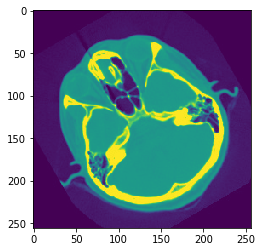

In [62]:
img = sitk.ReadImage(fdata("cthead1.png"))
myshow(img)

## Comparative Operators
<table>
    <tr><td>Operators</td></tr>
    <tr><td>&gt;</td></tr>
    <tr><td>&gt;=</td></tr>
    <tr><td>&lt;</td></tr>
    <tr><td>&lt;=</td></tr>
    <tr><td>==</td></tr>
</table>

These comparative operators follow the same convention as the reset of SimpleITK for binary images. They have the pixel type of ``sitkUInt8`` with values of 0 and 1. 
    

In [ ]:
img = sitk.ReadImage(fdata("cthead1.png"))
myshow(img)

### Amazingly make common trivial tasks really trivial

In [ ]:
myshow(img>90)

In [ ]:
myshow(img>150)

In [ ]:
myshow((img>90)+(img>150))